### 1. Import Dependecies

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

### 2. Import data

In [2]:
df = pd.read_csv("data/processed/Telco_Binning_Applied.csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bins
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Newer
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Medium
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Newer
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Medium
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Newer


In [4]:
categorical_columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

### 3.  Univariate Analysis

In [17]:
for col in categorical_columns:
    print(f"\n=== {col} ===")

    temp = pd.DataFrame({
        'Count': df[col].value_counts(),
        'Percent': df[col].value_counts(normalize=True) * 100
    })

    temp = temp.round(2)   # optional: round percentages
    print(temp)



=== gender ===
        Count  Percent
gender                
Male     3549    50.47
Female   3483    49.53

=== SeniorCitizen ===
               Count  Percent
SeniorCitizen                
0               5890    83.76
1               1142    16.24

=== Partner ===
         Count  Percent
Partner                
No        3639    51.75
Yes       3393    48.25

=== Dependents ===
            Count  Percent
Dependents                
No           4933    70.15
Yes          2099    29.85

=== PhoneService ===
              Count  Percent
PhoneService                
Yes            6352    90.33
No              680     9.67

=== MultipleLines ===
                  Count  Percent
MultipleLines                   
No                 3385    48.14
Yes                2967    42.19
No phone service    680     9.67

=== InternetService ===
                 Count  Percent
InternetService                
Fiber optic       3096    44.03
DSL               2416    34.36
No                1520    21.

In [7]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [27]:
for col in categorical_columns:
    print(f"\nChurn rate by {col}:")
    print(df.groupby(col)['Churn'].mean()*100)



Churn rate by gender:
gender
Female    26.959518
Male      26.204565
Name: Churn, dtype: float64

Churn rate by SeniorCitizen:
SeniorCitizen
0    23.650255
1    41.681261
Name: Churn, dtype: float64

Churn rate by Partner:
Partner
No     32.976092
Yes    19.717065
Name: Churn, dtype: float64

Churn rate by Dependents:
Dependents
No     31.279140
Yes    15.531205
Name: Churn, dtype: float64

Churn rate by PhoneService:
PhoneService
No     25.000000
Yes    26.747481
Name: Churn, dtype: float64

Churn rate by MultipleLines:
MultipleLines
No                  25.081241
No phone service    25.000000
Yes                 28.648466
Name: Churn, dtype: float64

Churn rate by InternetService:
InternetService
DSL            18.998344
Fiber optic    41.892765
No              7.434211
Name: Churn, dtype: float64

Churn rate by OnlineSecurity:
OnlineSecurity
No                     41.778667
No internet service     7.434211
Yes                    14.640199
Name: Churn, dtype: float64

Churn rate by O

### 4. Bivariate Analysis

In [30]:
cat_cols = ['gender','SeniorCitizen','Partner','Dependents','InternetService',
            'OnlineSecurity','OnlineBackup','TechSupport','Contract',
            'PaymentMethod','PaperlessBilling']

for col in cat_cols:
    table = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(table)
    print(f"{col}: p-value = {p:.4f}")

gender: p-value = 0.4905
SeniorCitizen: p-value = 0.0000
Partner: p-value = 0.0000
Dependents: p-value = 0.0000
InternetService: p-value = 0.0000
OnlineSecurity: p-value = 0.0000
OnlineBackup: p-value = 0.0000
TechSupport: p-value = 0.0000
Contract: p-value = 0.0000
PaymentMethod: p-value = 0.0000
PaperlessBilling: p-value = 0.0000


In [36]:
numerical_columns = ['MonthlyCharges', 'TotalCharges',]

In [37]:
churned = df[df['Churn']==1]
not_churned = df[df['Churn']==0]

for col in numerical_columns:
    t, p = ttest_ind(churned[col], not_churned[col], nan_policy='omit')
    print(f"{col}: p-value = {p:.4f}")


MonthlyCharges: p-value = 0.0000
TotalCharges: p-value = 0.0000


### 5. Correlation Matrix

In [38]:
numerical_columns = ['MonthlyCharges', 'TotalCharges','Churn']

In [40]:
corr_matrix = df[numerical_columns].corr()

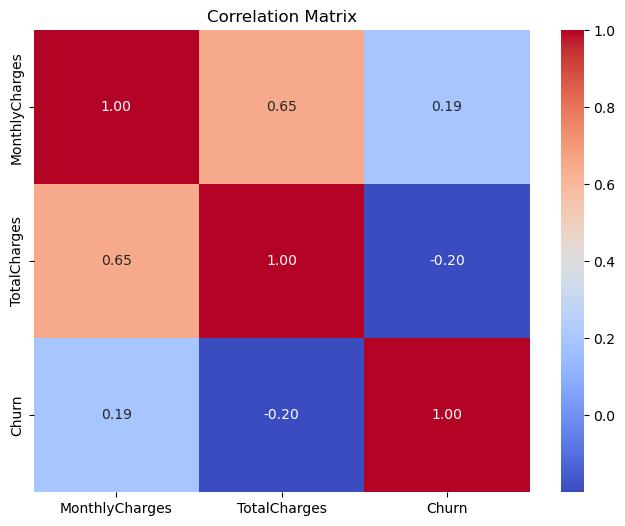

In [41]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
